In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, math
import matplotlib.pyplot as plt
import itertools



## 1. 
### Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [20]:
for i in range (0,2):
    a = int(input("type in a digit from 0 to 36: "))
    if a > 36: 
        print('You are out of range')
        break
    x = int(np.random.uniform(0,36))
    print(('-')*50)
    print(x)

type in a digit from 0 to 36: 2
--------------------------------------------------
32
type in a digit from 0 to 36: 3
--------------------------------------------------
6


## 2.                                                                                                                        

### 1.) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Проверим, что для противоположных событий p(A) + p(B) = 1.
Подбросим монетку n раз (пусть 1 - орел и 0 - решка) и посчитаем сколько раз выпал орел (k раз). После этого посчитаем вероятности выпадения орла и решки (p1 и p2 соответственно) как количество выпадений орла (k) и решки (n-k) на этой дистанции к общему количетву испытаний (n). Согласно теореме сумма этих вероятностей должна равняться 1.

Прим.: метод count для подсчета количества вхождений элемента в массив не работает с типом numpy.ndarray, возвращаемым np.random.randint. Поэтому преобразуем numpy.ndarray в list

count(1) количество успехов

In [21]:
n = 100
k = list(np.random.randint(0,2,n)).count(1)
p1 = k / n            #кол орлов/total
p2 = (n-k) / n        #кол решек/total

print(f' вероятности  \n орлы p1:  {round(p1,2)} \n рещки p2: {round(p2,2)} \n \n p1 + p2 =  {p1 + p2}')
 
#count(1) количество орлов в массиве

 вероятности  
 орлы p1:  0.47 
 рещки p2: 0.53 
 
 p1 + p2 =  1.0


2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [22]:
x = []  # список выборок
sum = [] # сумма эелементов из каждой выборки

for i in range(0,10):
    sum.append(0)
    x.append(np.random.randint(0,9,10))

#print(x)
sum = x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]
print (sum)

[44 48 38 47 35 35 26 43 35 54]


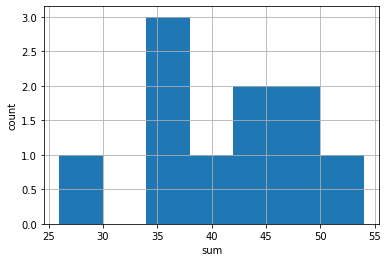

In [23]:
num_bins = 7

n, bins, patches = plt.hist(sum, num_bins)
plt.xlabel('sum')
plt.ylabel('count')
plt.grid()

## 3.
### 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

Сколько получается по коду из видео:

In [24]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k = k + 1
print('Вероятность Monte Carlo: ',k / n)

Вероятность Monte Carlo:  0.3742


math.factorial = The factorial function (symbol: !) says to multiply all whole numbers from our chosen number down to 1.

In [25]:
def Bernoulli(n,k):
    C_n_k = np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
    P_n_k = C_n_k / pow(2,n)
    print ('Вероятность Бернулли: ', P_n_k)
    return P_n_k
    

In [26]:
Bernoulli(4,2)

Вероятность Бернулли:  0.375


0.375

2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [27]:
Bernoulli(4,3), Bernoulli(10,3) # почему не работает

Вероятность Бернулли:  0.25
Вероятность Бернулли:  0.1171875


(0.25, 0.1171875)

### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [44]:
count = 0

for p in itertools.product("0123", repeat=2):
    print(''.join(p))
    count = count + 1
print("total", count)
print()

00
01
02
03
10
11
12
13
20
21
22
23
30
31
32
33
total 16



In [46]:
#2 Перестановки
count = 0

for p in itertools.permutations("0123",2):
    print("".join(str(x) for x in p))
    count = count + 1
print("total permutations: ", count)
print()

01
02
03
10
12
13
20
21
23
30
31
32
total permutations:  12



In [47]:
#3 Комбинации
count = 0
for p in itertools.combinations("0123",3):
    print(''.join(str(x) for x in p))
    count = count + 1
print("total combinations:", count)

012
013
023
123
total combinations: 4


In [48]:
#3 Комбинации
count = 0
for p in itertools.combinations("0123",3):
    print(''.join(str(x) for x in p))
    count = count + 1
print("total combinations:", count)

012
013
023
123
total combinations: 4


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

a, b по формуле для линейной регрессии: 0.689473513766127 0.15565950596161046
----------------------------------------------------------------------------------------------------
a, b по встроенной библиотеке: 0.6894735137661262 0.15565950596161077
----------------------------------------------------------------------------------------------------
Коэф корреляции по встроенной библиотеке: [[1.         0.92941751]
 [0.92941751 1.        ]]
x, y средние: 0.46842699227330803 0.47862751026718653
----------------------------------------------------------------------------------------------------
Коэф корреляции по формуле: 0.9294175050539834


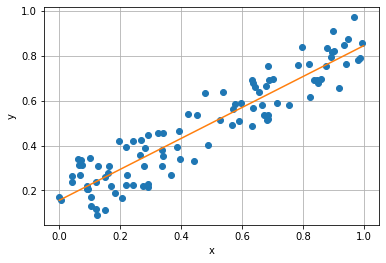

In [61]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

print("a, b по формуле для линейной регрессии:",a,b)
print(('-')*100)
print("a, b по встроенной библиотеке:",a1, b1)
c = np.corrcoef(x, y)
print(('-')*100)
print("Коэф корреляции по встроенной библиотеке:", c)

# ​ Дополните код расчетом коэффициента корреляции ​ x ​ и ​ y ​ по формуле
# найдем средние значения

x_avg = np.average(x)
y_avg = np.average(y)
print("x, y средние:",x_avg, y_avg)
print(('-')*100)
R = np.sum((x - x_avg)*(y - y_avg)) / (np.sum((x-x_avg)**2)*(np.sum((y-y_avg)**2)))**0.5
print("Коэф корреляции по формуле:", R)
plt.plot([0, 1], [b, a + b])
plt.show()